In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine ,reflect=True)

# reflect the tables


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(recent_date)

2017-08-23


In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#prcp_data = session.query(Measurement).
# Calculate the date one year from the last date in data set.

last_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data,columns = ["Date","Precipitaion"]).sort_values(by="Date")
prcp_df.set_index(prcp_df['Date'], inplace=True)
# Sort the dataframe by date
prcp_df.tail()

,Date,Precipitaion
Date,,
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.45


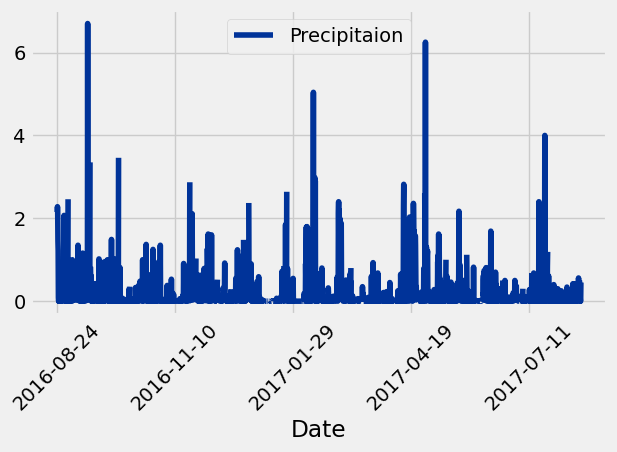

In [50]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x_compat=True, color='#003399') 
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('prcp_data.png')

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitaion
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
stations_total = session.query(Station).count()
print(stations_total)

9


In [57]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs))\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.tobs).desc()).all()
                
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = active_stations[0][0]
results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == station_id).all()
results_df = pd.DataFrame(results , columns=["Station","TOBS"])
max_tob = results_df.max()
min_tob = results_df.min()
avg_tob = results_df.mean()

station_dic ={"Station" : station_id,
                         "Maximum TOB" : max_tob,
                         "Minimum TOB" : min_tob,
                         "Average TOB" : avg_tob}
station_df = pd.DataFrame(station_dic)
station_df

C:\Users\sriha\AppData\Local\Temp\ipykernel_11244\4153617537.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_tob = results_df.mean()


,Station,Maximum TOB,Minimum TOB,Average TOB
Station,USC00519281,USC00519281,USC00519281,NaN
TOBS,USC00519281,85.0,54.0,71.663781


In [83]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.
temp_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == station_id).order_by(Measurement.tobs >= last_year).all()
temp_df = pd.DataFrame(temp_data,columns=["Station","Temperature"])
temp_df.set_index("Station")

,Temperature
Station,
USC00519281,70.0
USC00519281,62.0
USC00519281,74.0
USC00519281,75.0
USC00519281,74.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0


# Close session

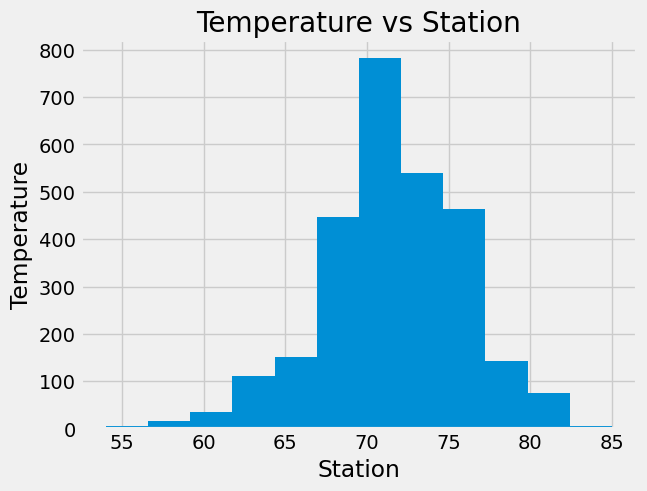

In [84]:
#and plot the results as a histogram

temp_df.hist(bins=12)

# set labels and title
plt.xlabel('Station')
plt.ylabel('Temperature')
plt.title('Temperature vs Station')

# show the plot
plt.show()


In [87]:
# Close Session
session.close()
